<a href="https://colab.research.google.com/github/amandagpereira/Imersao-de-Dados-04/blob/main/Allura_Aula02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

pd.options.display.float_format = '${:,.2f}'.format
dados.head(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
5,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000
6,"Rua Francisco Paulo, 31",Cidade Mãe do Céu,São Paulo,145,4,4,2,R$ 850.000
7,"Rua Guilherme Valente, 150",Jardim Vergueiro,São Paulo,150,2,2,2,R$ 450.000
8,"Rua Sagrada Família, 8",Jardim Benfica,São Paulo,48,2,1,1,R$ 199.900
9,Rua Tapaji,Vila Alpina,São Paulo,114,3,3,2,R$ 585.000


# **Desafios Aula 01**

**Desafio 01:** média da metragem de todos os bairros 

Para isso:
Usar a função groupby que, automaticamente agrupa os dados de acordo com parâmetro, semelhante ao SQL;
pode-se restringir o groupby, para não ser aplicado a valores nulos, com parametro (dropna = False);
parametro axis permite agrupar por linhas;

Importando dados via csv, descobrindo os dados com a função head()

In [3]:
# Desafio 01: média da metragem de todos os bairros
dados.groupby("Bairro")["Metragem"].mean()


Bairro
Aclimação           $253.06
Alto da Boa Vista   $418.88
Alto da Lapa        $294.34
Alto da Mooca       $270.05
Alto de Pinheiros   $433.44
                      ...  
Vila Água Funda     $152.20
Água Branca         $191.00
Água Fria           $165.42
Água Funda          $139.00
Água Rasa           $340.25
Name: Metragem, Length: 701, dtype: float64

**Desafio 02:** duas formas de selecionar os dados por bairro
* primeira forma: loc - a função é responsável por filtrar, sendo que o parametro pode ser uma series de booleanos;
* segunda forma: mais próxima da notação SQL, cujo parâmetro é uma string com os nomes das colunas. Dessa forma, não precisa mencionar sempre o dataframe que será utilizado. Esta notação é mais simples e legível.



---



In [4]:
#Desafio 02: duas formas de selecionar os dados por bairro
parametro_bairro = "Vila Madalena"
dados.loc[(dados['Bairro'] == parametro_bairro)]

dados.query('Bairro == @parametro_bairro')



,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
23,Rua Aldo de Azevedo,Vila Madalena,São Paulo,170,2,2,1,R$ 1.485.000
39,Rua Gregório Paes de Almeida,Vila Madalena,São Paulo,401,5,9,4,R$ 3.890.000
119,Rua dos Tamanás,Vila Madalena,São Paulo,440,4,5,4,R$ 3.950.000
138,NaN,Vila Madalena,São Paulo,534,5,6,5,R$ 4.500.000
167,Rua Judith,Vila Madalena,São Paulo,146,3,2,2,R$ 1.550.000
...,...,...,...,...,...,...,...,...
9326,Rua Alvilândia,Vila Madalena,São Paulo,380,7,5,2,R$ 2.900.000
9396,Rua Professor Nova Gomes,Vila Madalena,São Paulo,407,3,6,4,R$ 3.000.000
9484,NaN,Vila Madalena,São Paulo,385,7,5,6,R$ 2.900.000
9626,NaN,Vila Madalena,São Paulo,385,7,5,6,R$ 2.900.000


**Desafio 03.1** - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão
* neste primeiro gráfico, procurar pelos bairros da cidade de São Paulo que possuem imóveis com a maior metragem (em média). **Por que?** nos dados não existem informações sobre o período da precificação dos imóveis, porém é sabido que durante a pandemia houve uma procura maior por imóveis com maior metragem, devido a migração das pessoas para o home office, crianças mais tempo em casa, etc - é um dado a ser trabalhado futuramente;
* de toda forma, é necessária a filtragem desses dados devido o bairro Sítio Represa, por exemplo, apresentar uma metragem muito alta em relação aos demais (37.000 m2, em média);
* foi escolhido gráfico do tipo barras horizontais para comparação entre bairros, não foi escolhido barras verticais porque não há análise de tempo (dias, meses, anos);

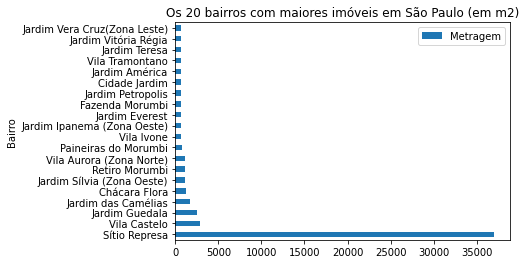

In [5]:
# Desafio 03 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão (Thiago)
dados_grafico_1 = dados.groupby("Bairro")[["Bairro","Metragem","Quartos","Banheiros","Vagas","Valor"]]
dados_grafico_1.mean().sort_values(by = "Metragem", ascending = False).head(20).plot.barh(y = "Metragem", title = "Os 20 bairros com maiores imóveis em São Paulo (em m2)", ylim=(0,40000))


**Desafio 03.2** - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão
* neste segundo gráfico, procurar pelos bairros da cidade de São Paulo que possuem imóveis com maior quantidade de cômodos. Seguindo a mesma temática anterior, nos dados não existem infromações sobre o período da precificação dos imóveis, porém é sabido que durante a pandemia houve uma procura maior por imóveis com maior metragem, devido a migração das pessoas para o home office, crianças mais tempo em casa, etc - é um dado a ser trabalhado futuramente;
* de toda forma, é necessária a filtragem desses dados. Existe relação entre a metragem de um imóvel e a quantidade de cômodos, conforme gráfico anterior? (Verificar posteriormente)
* foi escolhido gráfico do tipo barras horizontais para comparação entre bairros, não foi escolhido barras verticais porque não há análise de tempo (dias, meses, anos);


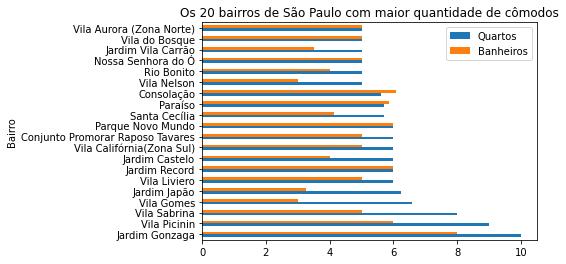

In [6]:
# Desafio 03 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão (Thiago)
dados_grafico_1 = dados.groupby("Bairro")[["Bairro","Quartos","Banheiros","Valor"]]
dados_grafico_1.mean().sort_values(by = "Quartos", ascending = False).head(20).plot.barh(title = "Os 20 bairros de São Paulo com maior quantidade de cômodos", ylim=(0,15))


**Desafio 04** - Pegar outros estatísticas dos dados, média, mediana, mim, max (Vivi)


In [7]:
# Desafio 04.1: mediana da metragem de todos os bairros
dados.groupby("Bairro")["Metragem"].median()

# Desafio 04.2: min da metragem de todos os bairros
dados.groupby("Bairro")["Metragem"].min()

# Desafio 04.2: max da metragem de todos os bairros
dados.groupby("Bairro")["Metragem"].max()

#Outra forma de visualizar os dados mínimo, máximo, média, etc
dados.describe(include = "all")


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
count,6574,9996,10008,"$10,008.00","$10,008.00","$10,008.00","$10,008.00",10008
unique,3130,701,1,NaN,NaN,NaN,NaN,1041
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,NaN,NaN,NaN,NaN,R$ 2.500.000
freq,24,409,10008,NaN,NaN,NaN,NaN,182
mean,NaN,NaN,NaN,$442.30,$3.48,$3.88,$4.10,NaN
std,NaN,NaN,NaN,"$7,515.38",$1.06,$1.99,$2.82,NaN
min,NaN,NaN,NaN,$10.00,$1.00,$1.00,$1.00,NaN
25%,NaN,NaN,NaN,$173.00,$3.00,$2.00,$2.00,NaN
50%,NaN,NaN,NaN,$290.00,$3.00,$4.00,$4.00,NaN
75%,NaN,NaN,NaN,$460.25,$4.00,$5.00,$5.00,NaN


**Desafio 05** - Descobrir quais são os bairros que não tem nome de Rua. (Vivi)



In [8]:
#Desafio 05 - descobrir quais bairros não tem nome de rua
filtro_nome_rua = [dados.Rua.isnull()]
dados.loc[dados.Rua.isnull()]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
11,NaN,Jardim Luzitânia,São Paulo,436,4,3,3,R$ 15.000
31,NaN,Parque da Lapa,São Paulo,220,4,4,3,R$ 849.000
56,NaN,Chácara Santo Antônio (Zona Sul),São Paulo,190,2,2,2,R$ 1.100.000
57,NaN,Jardim Guedala,São Paulo,650,4,6,4,R$ 5.500.000
...,...,...,...,...,...,...,...,...
9963,NaN,Jardim Petrópolis,São Paulo,423,5,7,6,R$ 2.800.000
9989,NaN,Parque Alves de Lima,São Paulo,127,2,1,2,R$ 400.000
9991,NaN,Vila Formosa,São Paulo,145,3,2,3,R$ 750.000
9995,NaN,Jardim Leonor,São Paulo,1350,5,9,7,R$ 9.500.000


# **Desafios Aula 02**

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tick



**Desafio 01** - Criar uma escala de valores em milhões

Para isso, alterar as configurações do pandas, conforme abaixo:


In [10]:
pd.options.display.float_format = '${:,.2f}'.format

In [11]:
#Credit: https://dfrieds.com/data-visualizations/how-format-large-tick-values.html

def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

**Desafio 02** - Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Quantidade')

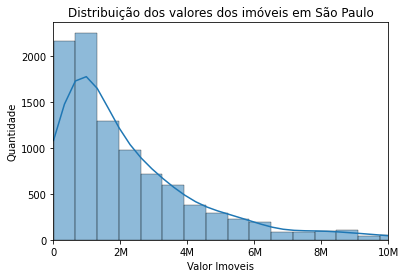

In [12]:
#colunas adicionadas em dados com o valor do imóvel convertido
valor_limpo = dados.Valor.str.extract(r'([0-9.]+)', expand = False)
valor_convertido = valor_limpo.str.replace(r'.','').astype(float)
dados.insert(7,"Valor Imoveis",valor_convertido)

#grafico sem notacao cientifica
plt.ticklabel_format(style = 'plain', useOffset = False)

#kde = calcula a densidade aproximada 
#bins = largura das barras
ax = sns.histplot(data = dados.sort_values(by = "Valor Imoveis"), x = "Valor Imoveis",kde = True, bins = 100)
ax.set_xlim(left = 0, right = 10000000)

#para escala em milhoes, bilhoes, mil
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

ax.set_title("Distribuição dos valores dos imóveis em São Paulo")
ax.set_ylabel("Quantidade")


**Desafio 03** - Preço do metro quadrado por bairro e plotar em um gráfico ideal

O cálculo do metro quadrado por imóvel é feito atraves de "preco_metro_quadrado", onde é divido o preço do valor do imóvel pela metragem. Estes valores são inseridos na coluna "Preco_M2" do df "dados"

Ao criar o primeiro gráfico, optei por um gráfico de barras, para representar a média o preço do metro quadrado por bairro, pois trata-se de dados contínuos.

Problemas: tentei usar a biblioteca seaborn, porém ao plotar o gráfico do tipo histplot, ao tentar usar o index do Datagroup do tipo "maiores_precos_m2", que são textos do tipo "Bairro", sempre fazia a contagem dos bairros, que é sempre 1, pois são dados agrupados. Dessa forma, usei matplotlib.pyplot para chegar em resultados mais satisfatórios.

Conclusões: existem valores discrepantes, tanto nos 50 maiores preços por metro quadrado, quanto nos 50 menores preços por metro quadrado. 

In [13]:
#Descobrir o preco do metro quadrado = valor do imóvel / m2
preco_metro_quadrado = dados["Valor Imoveis"].div(dados["Metragem"])
dados.insert(8,"Preco_M2",preco_metro_quadrado)


,Metragem,Quartos,Banheiros,Vagas,Valor Imoveis,Preco_M2
Bairro,,,,,,
Vila Guaca,$10.00,$3.00,$2.00,$2.00,"$800,000.00","$80,000.00"
Jardim Teresa,$900.00,$6.00,$8.00,$8.00,"$22,000,000.00","$24,309.39"
Jardim Ampliação,$92.50,$3.00,$3.00,$2.50,"$800,000.00","$18,968.75"
Jardim América,$651.00,$4.00,$5.00,$6.00,"$8,900,000.00","$18,469.66"
Jardim Europa,$552.50,$4.00,$5.00,$4.00,"$8,500,000.00","$17,793.82"
Jardim Luzitânia,$480.00,$4.00,$5.00,$4.00,"$6,000,000.00","$15,981.58"
Vila Nova Conceição,$220.00,$3.00,$3.00,$3.00,"$3,000,000.00","$15,371.43"
Jardim Paulista,$450.00,$4.00,$5.00,$4.00,"$5,500,000.00","$14,117.65"
Itaim Bibi,$150.00,$3.00,$2.00,$2.00,"$2,300,000.00","$13,265.31"


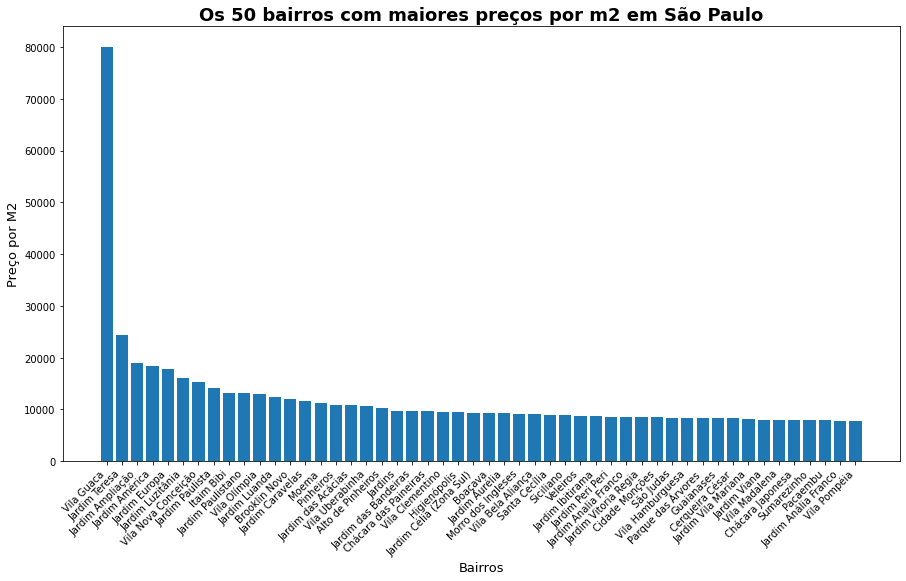

In [14]:
#busca pelos 50 bairros com maiores preços por m2
maiores_precos_m2 = dados.groupby("Bairro").median().sort_values(by = "Preco_M2", ascending = False).head(50)

plt.figure(figsize=(15,8))

#Gráfico de barras - maiores preços por metro quadrado
ax2 = plt.bar(maiores_precos_m2.index, height = maiores_precos_m2["Preco_M2"].astype(float))

#deixar eixo X com interface mais amigável
plt.xticks(rotation=45, ha='right')

plt.xlabel("Bairros", fontdict={'fontsize': 13, 'weight': 'normal'})
plt.ylabel("Preço por M2", fontdict={'fontsize': 13, 'weight': 'normal'})
plt.title("Os 50 bairros com maiores preços por m2 em São Paulo", fontdict={'fontsize': 18, 'weight': 'bold'})

maiores_precos_m2.head(10)

,Metragem,Quartos,Banheiros,Vagas,Valor Imoveis,Preco_M2
Bairro,,,,,,
Jardim Domitila,$202.50,$3.00,$2.00,$4.00,"$2,500.00",$12.35
Vila Noca,$254.50,$4.00,$4.00,$4.00,"$4,000.00",$15.72
Vila União(Zona Norte),$102.50,$3.00,$1.00,$1.00,"$1,980.00",$19.33
Consolação,$452.00,$4.00,$6.00,$5.00,"$28,000.00",$60.87
Sítio Represa,"$37,000.00",$4.00,$2.00,$4.00,"$2,900,000.00",$78.38
Ibirapuera,$434.00,$4.00,$6.00,$3.00,"$45,000.00",$103.69
Jardim Vera Cruz(Zona Leste),$642.50,$3.00,$2.00,$5.00,"$350,000.00",$544.76
Jardim Nove de Julho,$520.00,$3.00,$2.00,$2.00,"$450,000.00",$865.38
Vila Aurea,$182.00,$3.00,$1.00,$2.00,"$165,000.00",$906.59


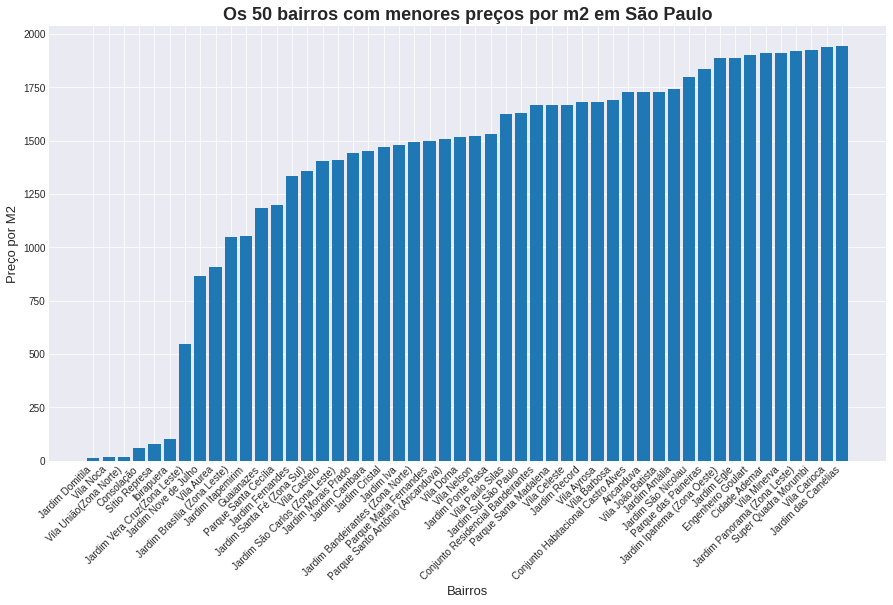

In [15]:
#busca pelos 50 bairros com menores preços por m2
menores_precos_m2 = dados.groupby("Bairro").median().sort_values(by = "Preco_M2", ascending = True).head(50)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,8))

#Gráfico de barras - maiores preços por metro quadrado
ax3 = plt.bar(menores_precos_m2.index, height = menores_precos_m2["Preco_M2"].astype(float))

#deixar eixo X com interface mais amigável
plt.xticks(rotation=45, ha='right')

plt.xlabel("Bairros", fontdict={'fontsize': 13, 'weight': 'normal'})
plt.ylabel("Preço por M2", fontdict={'fontsize': 13, 'weight': 'normal'})
plt.title("Os 50 bairros com menores preços por m2 em São Paulo", fontdict={'fontsize': 18, 'weight': 'bold'})

menores_precos_m2.head(10)

**Desafio 04** - Explorar as bibliotecas de visualizações e colocar as suas conclusões

**Desafio 05** - Pesquisar um visualização para analisar os quartis, mediana e outliers

 - Quartis - o que é?
Quartis dividem uma amostra em quatro partes iguais, para avaliar dispersão e tendencia de uma amostra. 
Primeiro quartil - 25% dos dados são menores ou iguais a este valor;
Segundo quartil - Mediana - 50% dos dados são maiores ou iguais a este valor
Tercerio quartil - 75% dos dados são maiores que este valor.
Amplitude interquartílica - Distancia entre o primeiro e terceiro quartil, ultrapassa o meio dos 50% dos dados.
Mediana e amplitude interquartílica são uma medida da **melhor tendencia central** . (Fonte: https://support.minitab.com/pt-br/minitab/18/help-and-how-to/graphs/how-to/boxplot/interpret-the-results/key-results/)


 - Uma forma simples de descobrir os quartis é com a funcao describe(), outra forma são através dos gráficos do tipo boxplot;
  - Agrupei os dados do tipo Quartos, Banheiros e Vagas, pois tratam de variáveis contínuas do DataFrame menores que 50, neste grupo dos gráficos do tipo boxplot (abaixo) pode-se observar que:
      - Quartos: os dados discrepantes são daqueles imóveis que tem menos de 2 quartos e mais que 6 quartos. A média é de 4 quartos;
      - Banheiros: os dados discrepantes são daqueles imóveis que tem mais de 10 banheiros. A média é de 4 banheiros;
      - Vagas: os dados discrepantes são daqueles imóveis que tem mais de 10 vagas. A média é de 4 vagas por imóvel;
  - O dados do tipo Valor Imoveis pode-se observar que:
      - os dados discrepantes são daqueles imóveis cujo valor é acima de 7 milhões. A média é 1,5 milhões;
  - O dados do tipo Metragem pode-se observar que:
      - os dados discrepantes são daqueles cuja metragem dos imóveis é acima de 850 m2. A média é 400 m2;

      - Minhas considerações a respeito: considerando que a média dos valores dos imóveis em São Paulo é aproximadamente 1,5 milhões, metragem média dos imóveis de 400 m2 e considerando 701 bairros distintos na base, trata-se de uma base de dados de imóveis de alto padrão, voltados para a classe média ou alta?  


In [16]:
dados.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor Imoveis,Preco_M2
count,"$10,008.00","$10,008.00","$10,008.00","$10,008.00","$10,008.00","$10,008.00"
mean,$442.30,$3.48,$3.88,$4.10,"$2,794,169.56","$7,326.23"
std,"$7,515.38",$1.06,$1.99,$2.82,"$3,866,248.54","$5,527.42"
min,$10.00,$1.00,$1.00,$1.00,"$1,650.00",$8.25
25%,$173.00,$3.00,$2.00,$2.00,"$750,000.00","$4,242.42"
50%,$290.00,$3.00,$4.00,$4.00,"$1,600,000.00","$6,153.85"
75%,$460.25,$4.00,$5.00,$5.00,"$3,350,000.00","$9,047.62"
max,"$750,000.00",$16.00,$40.00,$50.00,"$65,000,000.00","$80,000.00"


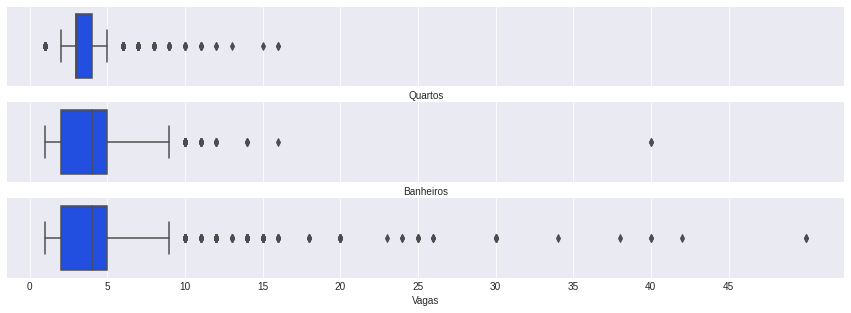

In [17]:
#Paleta de cores
sns.set_palette(sns.color_palette("bright"))

#Graficos do tipo boxplot para visualizacao da distribuição das variaveis continuas do DataFrame:

#Distribuição dos comodos dos imoveis - variacao entre 1 e 50, por isso mesmo grupo de gráficos

#Varios graficos em uma unica figura, serão 3 colunas para 1 linha, sendo que todos os gráficos compartilham o mesmo eixo y (sharey)
fig, axes = plt.subplots(3,1, sharex = True, figsize=(15,5))

for axe in axes:
  axe.set_ylim(0,50)
  axe.set_xticks(np.arange(0, 50, 5)) #eixo x com no máximo 50, de 5 em 5

sns.boxplot(ax = axes[0],x = dados["Quartos"])
sns.boxplot(ax = axes[1],x = dados["Banheiros"])
sns.boxplot(ax = axes[2],x = dados["Vagas"])


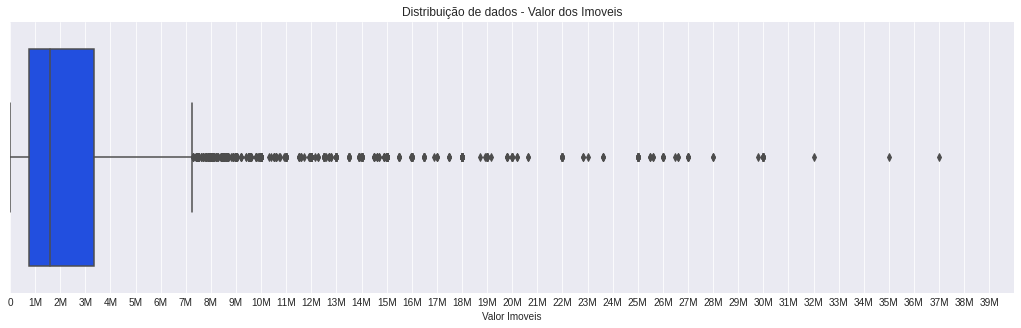

In [66]:
#Graficos do tipo boxplot para visualizacao da distribuição das variaveis continuas do DataFrame:

#Distribuição do valor dos imoveis
axe5 = sns.boxplot(x = dados["Valor Imoveis"].astype(float))
axe5.set_title("Distribuição de dados - Valor dos Imoveis")
axe5.set_xlim(0,40000000)
axe5.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
axe5.set_xticks(np.arange(0, 40000000, 1000000)) #eixo x com no máximo 40000000, de 1M em 1M
axe5.figure.set_size_inches(18,5)

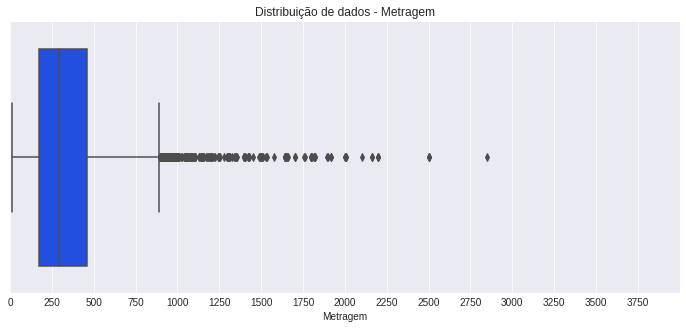

In [67]:
#Graficos do tipo boxplot para visualizacao da distribuição das variaveis continuas do DataFrame:

#Distribuição do metro quadrado dos imoveis
axe6 = sns.boxplot(x = dados["Metragem"].astype(float))
axe6.set_title("Distribuição de dados - Metragem")
axe6.set_xlim(0,4000)
axe6.set_xticks(np.arange(0, 4000, 250))
axe6.figure.set_size_inches(12,5)

In [70]:
#Contar bairros distintos
dados["Bairro"].nunique() 

701